__Author__: Christian Camilo Urcuqui López

__Date__: 2 October 2018

This nootebook illustrate the basic theory from the references and illustrate their applications to make an artificial neural network with Python. In order to cover these ideas, the content is divided in the next sections:
+ [Perceptron](#Perceptron)
+ [Linear Perceptrons as Neurons](#Linear-Perceptrons-as-Neurons) 
+ [Sigmoid, Tanh, and ReLU](#Sigmoid,-Tanh,-and-ReLU)
+ [Softmax](#Softmax)
+ [Gradient Descent](#Gradient-Descent)
+ [Neural Network](#Neural-Network)
    + [Overfitting and Underfitting](#Overfitting-and-Underfitting)
    + [Early stopping](#Early-stopping)
    + [Regularization](#Regularization)
    + [Dropout](#Dropout)
+ [References](#References)


# Perceptron

In order to understand how the biological brain works to desingn artificial intelligence, Warren McCulloch and Walter Pitts published the first concept of a simplified brain cell [2].

<img src="../../Utilities/warren_piits.jpg" height="500" width="500"/>

```
McCulloch, W. S., & Pitts, W. (1943). A logical calculus of the ideas immanent in nervous activity. The bulletin of mathematical biophysics, 5(4), 115-133.
```
In their work they explained that a nerve cell can be represented as a simple logic gate with binary outputs; multiple signals arrive at the _dendrites_, are then integrated into the _cell body_, and, if the accumulated signal exceeds a certain threshold, an output signal is generated that will passed on by the _axon_.

<img src="../../Utilities/perceptron_neuron.png" height="500" width="500"/>



Years ago, Frank Rosenblatt published the first concept of the perceptron at the age 1957 (Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. Psychological review, 65(6), 386.). 


<img src="http://www.rutherfordjournal.org/images/TAHC_rosenblatt-sepia.jpg" height="200" width="200"/>

From these ideas we can illustrate the representation of the biologic process in a mathematical methodology, the neuron gets its inputs along _dentrities_. Each of these incoming connections is dynamically strengthened or weakened based on how often it is used (the learn process that we have) and it's strength of each connection that determines the contribution of the input to the neuron's output. After this process, the inputs are summed together in the cell body. The sum is then transformed into a new signal that is propagated along the cell´s axon and sent off to other neurons. 

So, we can have the next inputs, outputs and a function:

$w = [w_{1}, w_{2}, ..., w_{n}]$ it is the vector of weights for our perceptron

$x = [x_{1}, x_{2}, ..., x_{n}]$ it is the vector of inputs 

$y = f(x \cdot w + b)$ we can represent the function and the neuron's output, b is the _bias_ term to produce the logit

# Linear Perceptrons as Neurons


In this notebook we will explore and make the functions of a perceptron solution, in order to prove it's capacities we will use the IRIS dataset for a classification problem. For the propose of this exercise we will only explore a __binary classification problem (we don't make a model to for One-vs-all (OvA) or One-vs-rest(OvR))__

This is the pseudo code of the perceptron:


```
1. Start with random weights: w1, ..., wn, b
2. For every misclassified point(X1, ..., Xn):
    2.1. if prediction = 0:
        - For i = 1 ... n:
            - Change Wi + $\alpha$ Xi
        - Change b to b + $\alpha$
    2.2 if prediction = 1:
        - For i = 1 ... n:
            - Change Wi - $\alpha$ Xi
        - Change b to b - $\alpha$

```

Pay attention that right now we have two hyperparameters, they are $\alpha$ and $b$

In [10]:
import numpy as np

class Perceptron(object):
  
    """Perceptron classifier
    
    Parameters
    -----------
    eta: float
        It is the learning rate (between 0.0 and 1.0) remember that it is better to have a lower value
    n_iter: int
        Passes over the training dataset
    
    Attributes
    -----------
    w_ :1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch
        
    """
    # Setting the random seed
    np.random.seed(42)
    
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta # learning rate
        self.n_iter = n_iter # number of iterations
        
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the numbner of samples and  n_features is the number of features
        y: array-like, shape = [n_samples]
            Target values.
        
        Returns
        ----------
        self: object       
        
        """
        
        self.w_ = np.zeros(1 + X.shape[1]) # this line makes a vector of zeros which represents the weights
                                           # the position is going to save the bias 
        self.errors_ = []
        
        # the next lines is the learning process from the data
        for _ in range(self.n_iter):
            errors = 0 
            for xi, target in zip(X, y):
                # update the weigths according to the perceptron learning rule 
                update = self.eta * (target - self.predict(xi)) # learning rate * (error of Xi)
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
        
    def net_input(self, X):
        """Calculate net input"""
        # it is useful to calculate the vector dot product 
        # Wx + d
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # Step function
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
# another way to make a perceptron

import numpy as np

np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y[i] - y_hat == 1:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
    return W, b
    
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    # these code lines allows us to make the random W and b 
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    #boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        #boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

## Load the data

Pandas is a library to load the Iris dataset from a public repository into a DataFrame Object 

In [6]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Data preprocessing and visualization

As I told, we will only explore a binary problem, so we will select the class labels that correspond to the 50 Iris-Setosa and 50 Iris-Versicolor flowers, and we will convert them in two interger class labels 1(Versicolor) and -1 (Setosa). Moreover, we will only extract the first feature columns (sepal length) and the third feature column (petal length) of those 100 traning samples. 

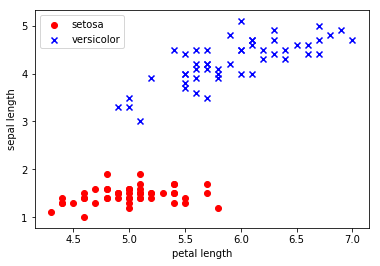

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# the next lines will filter the dataset
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa',-1,1)
X = df.iloc[0:100, [0,2]].values

# the next lines will make the scatter plot 
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

### Training phase 

It is time train our previous perceptron on the Iris Data that we downloaded. The next code will plot the misclassification error for each epoch to check if the algorithm converged and found a lmit that separates the two classes. 

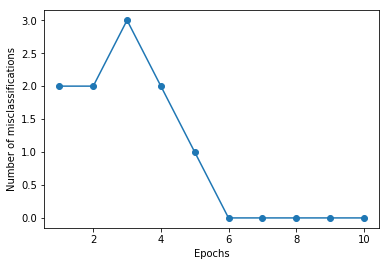

In [11]:
ppn = Perceptron (eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Number of misclassifications")
plt.show()


The previous graphic shows us that the perceptron converges in the epoch 6. The next code provides us a visualization mechanism to know the decision boundaries.

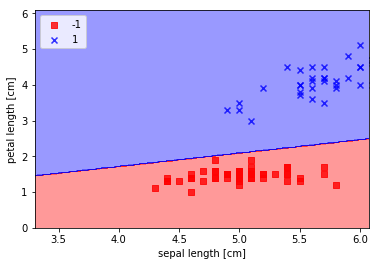

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map, I am goint to define a number of colors and markers via ListedColormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    # the next two lines define us the minimum and maximum values for the two features, so we will divide them in a pair of grids
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    # the next line allows us to flatten the grid arrays and create a matrix that has the same number of columns as the Iris 
    # training subset
    xx1, xx2 =  np.meshgrid(np.arange(x1_min, x2_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    # a countour plot maps the different decision regions to different colors for each predicted class in the grid array
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker= markers[idx], label=cl)
    
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
    

    

According to Frank Rosenblatt, Perceptron is a good choice to revolve binary problems that are separated by a linear hyperplane (he proved this mathematically). However, if classes cannot be separated perfectly by such a linear decision boundary, the weights will never stop updating unless we set a maximum number of epochs. 

It is important to know that a perceptron allows us to separate a binary problem by a linear hyperplane, and through its result, we can use a step function in order to interpret them. In the last example we got two categorizations red for setoza and blue for versicolor, some of the step funcions are Sigmoid, Tanh, and ReLU. We can illustrate the representation of a perceptron like a combination of the next components. 

![image](../../Utilities/perceptron_general.png)



## AND Perceptron 


The idea with the next example is to determine the correct weights and bias in order to make an AND Perceptron.

In [7]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.5
weight2 = 0.5
bias = -1


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):    
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -1.0                    0          Yes
      0          1                  -0.5                    0          Yes
      1          0                  -0.5                    0          Yes
      1          1                   0.0                    1          Yes


## OR Perceptron

The idea with the next example is to determine the correct weights and bias in order to make an OR Perceptron.

In [11]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.5
weight2 = 0.5
bias = -0.5


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, True, True, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):    
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -0.5                    0          Yes
      0          1                   0.0                    1          Yes
      1          0                   0.0                    1          Yes
      1          1                   0.5                    1          Yes


## NOT Perceptron

In [12]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.0
weight2 = -0.5
bias = 0.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                   0.0                    1          Yes
      0          1                  -0.5                    0          Yes
      1          0                   0.0                    1          Yes
      1          1                  -0.5                    0          Yes


## XOR Perceptron 

The only way to make a XOR Perceptron is to make a multilayer perceptron integrated by  OR and NAND (NAND is an interconnection of an AND and NOT logic ports) neurons whose results are going to be a part of a AND neuron.

## Error Function

How far are we from the objective? The error function (Log-loss error function) allows us to take the best direction, but, this function needs to be differentiable and continuous. In our case, we are going to talk about the gradient descent.

<img src="../../Utilities/gradient_interpretation.png" height="500" width="500"/>

The idea is to implement a way to find the global optimum which has the best decision for our weights with a low cost.

<img src="https://cdn-images-1.medium.com/max/1600/0*rBQI7uBhBKE8KT-X.png" height="500" width="500"/>

In order to apply gradient descent we must talk about continuous predictions, in other words, we must move from discrete predictions to continuous. Each probability is a representation of the distance of the line (the regresion function for our example).

We can talk about another kind of (single-layer) neural network model. __Adaline (ADAptive LINear Element)__ is a neural artificial network proposed by the professor Bernard Widrow and his student Ted Hoff in 1960. The difference between Adaline and Perceptron is that the new one uses continuous predicted values (from the net input) to learn the model coefficients, which is more "powerful" since it tells us by "how much " we are right or wrong.

<img src="https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png" />


The way to move to descriptive predictions to continuous predictions is to change the step function (_activation function_) to a sigmoid function.


<img src="https://cdn-images-1.medium.com/max/1600/1*_pnIqR8WmPVYyEmhoc_v-A.png" height="500" width="500"/>


In [13]:
class AdalineGD(object):
    """ADaptive LInear NEuron classifier
    
    Parameters
    ----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset.
        
    Attributes
    ----------
    w_: 1d-array
        Weights after fitting
    errors_: list
        Number of missclassifications in every epoch
        
    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape= [n_samples, n_features]
            Training vectors, 
            where n_samples is the number of samples and
            n_features is the number of features
        y: array-like, shape= [n_samples]
            Target values.
            
        Returns
        ----------
        self: object
        
        """
        self.w_ = np.zeros(1 +X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)


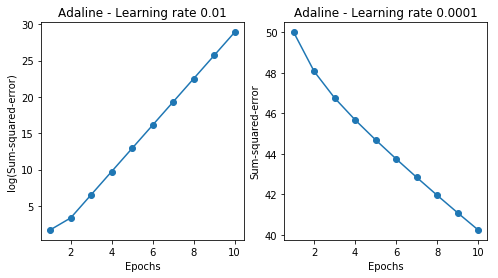

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

From the last example we can see the problem to use a learning rate that is too large - instead to minimize the error function we are increasing it in each epoch and the reason is that we _overshoot_ the global minimum -. However, when we chosen the learning rate =  0.0001 the algorithm will requiere a large of epochs to converge. 

<img src="https://pbs.twimg.com/media/DK26ibcXUAEOwel.jpg" height="500" width="500"/>

## Sigmoid, Tanh, and ReLU

The sigmoid function allows us to get results from 0 to 1 like a probability representation. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png" height="250" width="250"/>

The sigmoid formula is:


$\sigma(x)=\frac{1}{1 + e^{-x}}$

In [28]:
import numpy as np
"""
This is the sigmoid function that allows us to make the probabilities of 
a X ndarray
**/"""
def sigmoid(x):
    return 1 / (1+np.exp(-x))      
        

In [29]:
X = np.array([1,5,1,8])
print(sigmoid(X))

[0.73105858 0.99330715 0.73105858 0.99966465]


## Softmax 

If we have a classification problem with more than two categories we could use the softmax function that allows us to make predictions with probabilities on each category. 

It is a function that gives a probability between 0 to 1 for each values in a array, for example if we are in a classification problem the idea is to apply this function to transform the machine learning's output in probabilities.

This is the softmax function:

$S(k_{i})=\frac{e^y_{i}}{\sum_{j}^{} e^y_{i}}$




In [6]:
scores = [3.0, 1.0, 0.2]

import numpy as np 

def softmax(X):
    return (np.exp(X)/np.sum(np.exp(X), axis=0))

print(softmax(scores))

[0.8360188  0.11314284 0.05083836]


[-2.00000000e+00 -1.90000000e+00 -1.80000000e+00 -1.70000000e+00
 -1.60000000e+00 -1.50000000e+00 -1.40000000e+00 -1.30000000e+00
 -1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
  1.77635684e-15  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01
  8.00000000e-01  9.00000000e-01  1.00000000e+00  1.10000000e+00
  1.20000000e+00  1.30000000e+00  1.40000000e+00  1.50000000e+00
  1.60000000e+00  1.70000000e+00  1.80000000e+00  1.90000000e+00
  2.00000000e+00  2.10000000e+00  2.20000000e+00  2.30000000e+00
  2.40000000e+00  2.50000000e+00  2.60000000e+00  2.70000000e+00
  2.80000000e+00  2.90000000e+00  3.00000000e+00  3.10000000e+00
  3.20000000e+00  3.30000000e+00  3.40000000e+00  3.50000000e+00
  3.60000000e+00  3.70000000e+00  3.80000000e+00  3.90000000e+00
  4.00000000e+00  4.10000

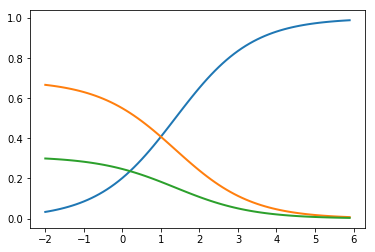

In [11]:
#Let's plot the softmax curves
import matplotlib.pyplot as plt

# we are goint to make a ndarray from -2 to 6 (excluded) integrated with the numbers by 0.1
x = np.arange(-2.0, 6.0, 0.1)
print(x)
print(x.shape)
# the numpy method vstack joins a sequence of arrays along a new axis.
# the method numpy.ones_like returns an array of ones with the same shape and type as a given array
scores = np.vstack([x,np.ones_like(x), 0.2 * np.ones_like(x)])
print(scores.shape)
print("----")
print(scores)

plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()

## One-Hot encoding

Sometimes we must work with categorical variables, variables that can't code by a regular encoding. In order to process those variables we can use the method One-Hot encoding, this allows us to make new columns for each category (_dummy variables_).

Let's see the application of the numpy method that allows us to make these dummy variables.

In [14]:
import pandas as pd
from pandas import Series, DataFrame

dictionary = {'name': ['camilo', 'daniel', 'mariana'],
             'category': ['student', 'researcher', 'teacher']
             }

frame = DataFrame(dictionary)
print("These are the dimensions of the DataFrame without one-hot encoding: "+ str(frame.shape))
new_frame = pd.get_dummies(frame)
print("These are the dimensions of the DataFrame with one-hot encoding: " + str(new_frame.shape))

These are the dimensions of the DataFrame without one-hot encoding: (3, 2)
These are the dimensions of the DataFrame with one-hot encoding: (3, 6)


## Cross Entropy

If we want to evaluate the models we might take all of probability results and multiple them in order to get the accuracy of each model, for example, think that we had trained two models (like perceptrons) to predict the probabilities of two colors, blue and red, and during the prediction test of four data we got the next results:
_Model one_
+ $P(point_{one}) = 0.7$
+ $P(point_{two}) = 0.1$
+ $P(point_{three}) = 0.6$
+ $P(point_{four}) = 0.2$

_Model two_
+ $P(point_{one}) = 0.7$
+ $P(point_{two}) = 0.9$
+ $P(point_{three}) = 0.8$
+ $P(point_{four}) = 0.6$


The result of the model will be $ 0.7 * 0.6 * 0.1 * 0.2 =  0.0084$, this model is not good, nevertheless of the model two that is better with 0.3024.

The problem to use this kind of operation in order to know the performance of the model is not good because a multiplication operation with a lot of features will have computing cost. One solution is to apply a sum between each probability, in order to apply this we can use the logarithmic function like $ln(A * B) = ln(A) + ln(B)$.


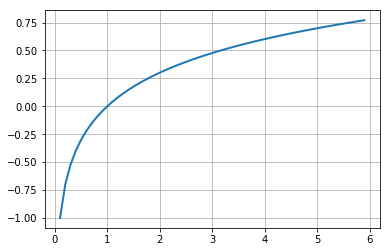

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.1 , 6.0, 0.1)

plt.plot(x, np.log10(x).T, linewidth=2)
plt.grid(True)
plt.show()


So let's see the application of logarithmic function:

$ln(0.6) + ln(0.2) + ln(0.1) + ln(0.7)  = (-0.51) + (-1.61) + (-2.3) + (-0.36)$

But the idea is to have positive numbers, with this idea we are going to multiply them with -1 and we get the next operation:

$(0.51) + (1.61) + (2.3) + (0.36) = 4.8$ 

This process is called _cross entropy_.

This is the cross entropy of the second model:

$ - ln(0.7) -  ln(0.9) - ln(0.8) -  ln(0.6)  = (0.36) + (0.1) + (0.22) + (0.51) =  1.2$

Like the multiplication of each probability we have that the second model is the best, we can say that the model with the low cross entropy is the best that represent the hypothesis for our dataset.

So, we can say that our __goal is minimize the Cross Entropy__


So the next idea is "we must calculate the cross entropy of each scenario behind the combination of each category". So the cross-entropy tells us when two vectors are similar or different.In other words it allows us to understand how far is the model's results to the desire outcomes. 

$Cross Entropy = - \sum_{i=1}^{m} y_{i}ln(p_{i}) + (1 - y_{i}) ln(1 -p_{i})$

In [68]:
import numpy as np 

def cross_entropy(Y, P):
    return -1 * (np.sum(np.dot(Y, np.log(P)) + np.dot(np.subtract(1,Y), (np.log(np.subtract(1,P))))))   

Y = np.array([1.0, 0.0, 1.0, 1.0], dtype=np.float64)
P = np.array([0.4, 0.6, 0.1, 0.5], dtype=np.float64)

print("The cross entropy is " + str(cross_entropy(Y, P)))


The cross entropy is 4.828313737302301


But we must think to problems with more than two clasess, with this idea in your head we can illustrate the _Multi-Class Cross-Entropy_ formula:

$Cross Entropy = - \sum_{i=1}^{n} \sum_{j=1}^{m} y_{(i,j)}ln(p_{(i,j)})$


## Logistic Regression

Logistic Regression (LR) is the most popular and useful machine learning algorithms, and the building blocks of Deep Learning architectures, these are the activities of LR.

+ Take your data
+ Pick a random model
+ Calculate the error
+ Minimize the error, and obtain a better model

In order to know the error we can calculate the cross entropy 

$Error = -(1-y)(ln(1-\hat{y}))-yln(\hat{y})$

So, in order to calculate the errors the error function is:

$Error=-\frac{1}{m}\sum_{i=1}^{m} (1-y_{i})(ln(1-\hat{y}_{i})) + y_{i}ln(\hat{y}_{i})$

So, remember that y' is the result from the sigmoid function of the linear function $Wx + b$, so the total formula for the error in terms of _w_ and _b_ is:

$ E(W,b) = -\frac{1}{m} \sum_{i=1}^{m} (1-y_{i})(ln(1-\sigma(Wx^{(i)}+b))+y_{i}ln(\sigma(Wx^{(i)}+b)$

## Gradient Descent

As I say, Gradient Descent is the way to reduce the error function in order to go to our objective, in other words, to allow our models to learn about the data and make the function to represent the hypothesis.

So, first we have the Linear regression prediction with the next two equations whose use the sigmoid of the weights and bias

$\hat{y}=\sigma(Wx+b) $ <- Bad

$\hat{y}=\sigma(w_{1}x_{1}+...+w_{n}x_{n}+b)$

The grandient of the error function is the vector formed by partial derivate of the error function with respect to the weights and the bias.

$\bigvee E=(\frac{\mathrm{dE}}{\mathrm{dw_{1}}},...,\frac{\mathrm{dE}}{\mathrm{dw_{n}}}, \frac{\mathrm{dE}}{\mathrm{db}})$

The learning rate alpha allows the process do not make dramatic changes

$\alpha = 0.1$

By the application of the gradient descent we are going to take the next weights and bias.

$w_{i}' := w_{i} - \alpha \frac{\mathrm{dE}}{\mathrm{dw_{i}}}$ 

$b' := b - \alpha \frac{\mathrm{dE}}{\mathrm{db}}$ 

So finally we are going to have the next prediction function:

$\hat{y}=\sigma(W'x+b') $ <- better

### Gradient Descent algorithm

1. Start with random weights:

    $w_{1},...,w_{n},b$
    
    
2. For every point $(x_{1},...,x_{n})$:

    2.1. For i=1 ... n
    
    2.1.1 Update $w'_{i} <- w_{i} -\sigma(\hat{y}-y)x_{i}$
    
    2.1.2 Update $b'_{i} <- b -\sigma(\hat{y}-y)$


3. Repeat until error is small


Our next propose is to minimize the _cost function J_ to learn weigths as the __Sum of Squared Errors (SSE)__ between the calculated outcome and the true class label

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color='blue', edgecolor='k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color='red', edgecolor='k')

def display(m, b, color='g--'):
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

         0         1  2
0  0.78051 -0.063669  1
1  0.28774  0.291390  1
2  0.40714  0.178780  1
3  0.29230  0.421700  1
4  0.50922  0.352560  1


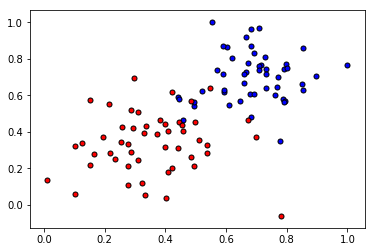

In [35]:
data = pd.read_csv('../../Datasets/students.csv', header=None)
print(data.head())
X = np.array(data.iloc[:,[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [36]:
import numpy as np
# Output (prediction) formula
def output_formula(features, weights, bias):    
    return sigmoid(np.dot(features, weights) + bias)

In [37]:
import numpy as np
# Error (Log-loss) formula
def error_formula(y, output):
    return ((-y)*(np.log(output))) - ((1 - y) * (np.log(1-output)))

In [51]:
import numpy as np
# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate *  d_error    
    return weights, bias
    

In [41]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.6421088391977083
Accuracy:  0.51

========== Epoch 10 ==========
Train loss:  0.5694143787753849
Accuracy:  0.71

========== Epoch 20 ==========
Train loss:  0.513145873185152
Accuracy:  0.83

========== Epoch 30 ==========
Train loss:  0.4686792892861609
Accuracy:  0.88

========== Epoch 40 ==========
Train loss:  0.43296926188984186
Accuracy:  0.93

========== Epoch 50 ==========
Train loss:  0.4038251698162646
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.37967400136774015
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.3593789633591534
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.3421087222748474
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.327246623288044
Accuracy:  0.93


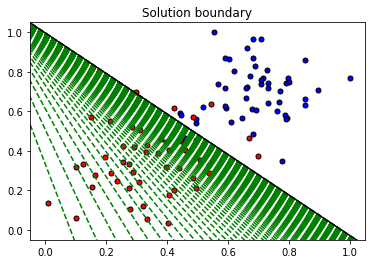

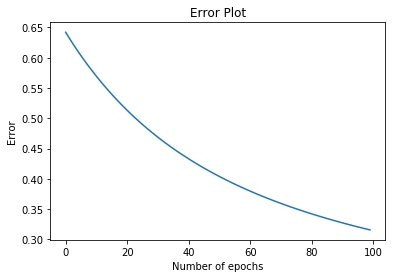

In [52]:
train(X, y, epochs, learnrate, True)

## Non-Linear models

In the last examples we have some data that can be separated through a linear function, but, sometimes we might use data with some complexity and a linear solution can't resolve it, (predict boundary is more difficult).

In these cases, the Multi-Layer Perceptrons or Neural Networks come to resolve these kinds of problems, and the concept behind this is the integration of the results of different linear functions (neural networks).

So the integration of different neurons and different layers is know like the neural network architecture.

We can have only a perceptron to resolve a linear problem, like we saw previously.

We can have a simple neural network with 3 layers, one for input, one hidden layer, and the last one is for the output, this kind of architecture is know as _fully-connected_ or _dense_ networks.

<img src="https://openi.nlm.nih.gov/imgs/512/35/2874804/PMC2874804_1471-2105-11-182-5.png" width="350"/>
We can have a lot of layers with nodes in the hidden layer, this kind of architecture is known as deep neural network.

<img src="https://www.oreilly.com/library/view/deep-learning/9781491924570/assets/dpln_0201.png" width="350"/>



## Neural Network

### Feedfordward

Feedforward is the process neural networks use to turn the input into an output

<img src="https://ds055uzetaobb.cloudfront.net/image_optimizer/42f14c313680eea5b5abcd08813074f09625a70b.png" width="350"/>

Once the feedfordward process is finished the error function is applied in order know the distances between the desire output and the prediction, these errors are calculated in order to apply the process to update the weights, this activity is known _Backpropagation_.

### Backpropagation

Running the feedforward operation backwards (backpropagation) to spread the error to each of the weights, and updates the weights, and gets a better model; recall the process that we saw _Gradient Descent_.

The idea is to repeat the same process more than one time, the repetition is know as _epoch_.

So let's recall some formulas that we saw previously in order to understand the math from the entire process to get the best model through the application of feedforward and backpropagation.

<b>Prediction</b>

$\hat{y}=\sigma(Wx+b)$

<b>Error function</b>

$Error=-\frac{1}{m}\sum_{i=1}^{m} (1-y_{i})(ln(1-\hat{y}_{i})) + y_{i}ln(\hat{y}_{i})$

<b>Gradient of the error function</b>

$\bigvee E=(\frac{\mathrm{dE}}{\mathrm{dw_{1}}},...,\frac{\mathrm{dE}}{\mathrm{dw_{n}}}, \frac{\mathrm{dE}}{\mathrm{db}})$

In __Multi-layer perceptron__ we are going to have a composition of functions namely matrix multiplications and sigmoids


<b>Prediction</b>

$\hat{y}=\sigma(W^{(3)})\bigodot\sigma(W^{(2)})\bigodot\sigma(W^{(1)}) (x)$

<b>Error function</b>


This function is the same but except the $\hat{y}$ is more complicated

$Error=-\frac{1}{m}\sum_{i=1}^{m} (1-y_{i})(ln(1-\hat{y}_{i})) + y_{i}ln(\hat{y}_{i})$

<b>Gradient of the error function</b>

$\bigvee E = (...,\frac{\mathrm{dE}}{\mathrm{dw^{i}_{j}}},...)$


This is one example

$\hat{y}=\sigma W^{(2)}\bigodot\sigma W^{(1)}(x)$


$$ W^{(1)} = 
\left(\begin{array}{cc} 
W^{(1)}_{11} & W^{(1)}_{12}\\
W^{(1)}_{21} & W^{(1)}_{22}\\
W^{(1)}_{31} & W^{(1)}_{32}
\end{array}\right)
W^{(2)} =
\left(\begin{array}{ds} 
W^{(2)}_{11} \\ 
W^{(2)}_{21} \\
W^{(2)}_{31}
\end{array}\right)
$$ 

$$ \bigvee E = 
\left(\begin{array}{aa} 
\frac{\mathrm{dE}}{\mathrm{dw^{1}_{11}}} & \frac{\mathrm{dE}}{\mathrm{dw^{1}_{12}}} & \frac{\mathrm{dE}}{\mathrm{dw^{2}_{11}}}\\
\frac{\mathrm{dE}}{\mathrm{dw^{1}_{21}}} & \frac{\mathrm{dE}}{\mathrm{dw^{1}_{22}}} & \frac{\mathrm{dE}}{\mathrm{dw^{2}_{21}}}\\
\frac{\mathrm{dE}}{\mathrm{dw^{1}_{31}}} & \frac{\mathrm{dE}}{\mathrm{dw^{1}_{32}}} & \frac{\mathrm{dE}}{\mathrm{dw^{2}_{31}}}\\
\end{array}\right)
$$

$ W^{'(k)}_{(ij)} - \alpha \frac{\mathrm{dE}}{\mathrm{dw^{(k)}_{ij}}}  \to W^{'(k)}_{ij} $

### The training process of the architecture

Let´s remember that the function of each neuron is $\hat{y}=h(xW+b)$

As I said the idea is make an architecture integrated by different layers of neurons where the ouput of one layer is the input of another one. With multiple input units and output units, we need to express the weights as a matrix. 

Recall that each neuron has a step function, for the next figure we can see them as $h_{n}$.

<img src='../Pytorch/assets/multilayer_diagram_weights.png' width=450px>


$$
\vec{h} = [h_1 \, h_2] = 
\begin{bmatrix}
x_1 \, x_2 \cdots \, x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_{11} & w_{12} \\
           w_{21} &w_{22} \\
           \vdots &\vdots \\
           w_{n1} &w_{n2}
\end{bmatrix}
$$

Through the integration of each neuron and their functions we can have:

$$
y =  f_2 \! \left(\, f_1 \! \left(\vec{x} \, \mathbf{W_1}\right) \mathbf{W_2} \right)
$$


## Overfitting and Underfitting

### Early stopping

The idea is to find the good ephoc when we are reducing the error both testing and testing sets, we need to find what is the best ephoc and stop at this moment the training process, the moment when we are not at underfitting (the best training error) and overfitting (the low testing error).

### Regularization

<i> 
    <center> LARGE COEFFICIENTS $\to$ OVERFITTING </center>
    <br>
    <center> PENALIZE LARGE WEIGHTS </center>
</i>
 <center>$(w_{1},...,w_{n})$ </center>
 
<b> L1 </b> ERROR FUNCTION $= -\frac{1}{m}\sum_{i=1}^{m} (1-y_{i})(ln(1-\hat{y}_{i})) + y_{i}ln(\hat{y}_{i}) + \lambda (|w_{1}|+..+|w_{n}|)$ 

<b> L2 </b> ERROR FUNCTION $= -\frac{1}{m}\sum_{i=1}^{m} (1-y_{i})(ln(1-\hat{y}_{i})) + y_{i}ln(\hat{y}_{i}) + \lambda (w_{1}^{2}+..+w_{n}^{2})$

<br>
<br>

<center> <b> L1 vs L2 Regularization </b> </center>

<b> L1 </b>

<b> Sparsity:</b>(1, 0, 0, 1, 0)

<p style="color:blue;"> Good for feature selection </p>

<hr>

<b> L2 </b>

<b> Sparsity:</b>(0.5, 0.3, -0.2, 0.4, 0.1)

<p style="color:green;"> Normally better for training models </p>


### Dropout

We randomly turn off some of the nodes in order to reduce the number of nodes that are mored trained than others, we can apply this through a probability each node will be dropped, and is useful to reduce the computing requeriments and processing.   

### Local Minima

Gradient Descent is not a good solution if during the training process the function finds a local minima, it is neccesary to add more activities in order to leave this situation and continue with the gradient descent application.

#### Random restart

Random restart is one solution, we start from a few different random places and do gradient descend from all of them, this increases the probability that we'll get to the global mininum or a pretty good local mininum.

#### Other activation functions

Another way to resolve the problem is to apply other activation functions, one of them is the _Hyperbolic Tangent Function_ knows as Tanh, this is the function:

$tanh(x)= \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Hyperbolic_Tangent.svg/1200px-Hyperbolic_Tangent.svg.png" width=300>

Another one is the _Rectified Linear Unit_ or RELU, this is the function:

$relu(x) = x$ if $>= 0$ || $0$ if $x < 0$

<img src="https://cdn-images-1.medium.com/max/1600/1*DfMRHwxY1gyyDmrIAd-gjQ.png" width=300>



<img src="https://www.researchgate.net/profile/Hoon_Chung2/publication/309775740/figure/fig1/AS:538049215381504@1505292337270/The-most-common-nonlinear-activation-functions_W640.jpg" width=300 >

In [1]:
import numpy as np
# Tanh function
def tanh(x):
    return  (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)) 

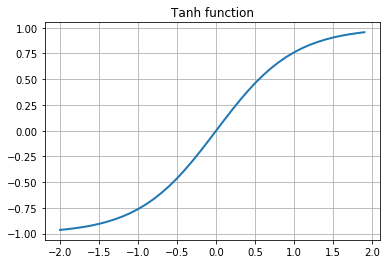

In [18]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-2.0 , 2.0, 0.1)

plt.plot(x, tanh(x.T), linewidth=2)
plt.grid(True)
plt.title("Tanh function")
plt.show()

In [15]:
import numpy as np
# ReLu function
def relu(x):
    result = []
    for i in x:
        if i >= 0:
            result.append(i)
        else:
            result.append(0)
    return result

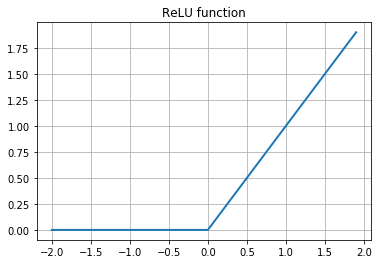

In [19]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-2.0 , 2.0, 0.1)

plt.plot(x, relu(x.T), linewidth=2)
plt.grid(True)
plt.title("ReLU function")
plt.show()

The ReLu function is usually uses in the hidden layer and depends of the problem we can use a Sigmoid or a ReLu function in the output layer.

<b> Output Layer </b>

<p style="color:green"> Classification $\to$ Sigmoid </p>

<p style="color:blue"> Regression $\to$ ReLU </p>

### Stochastic Gradient Descent

The idea behind this is simply that we take small subsets of data, run them through the neural network, calculate the gradient of the error of these subset and then move one step in that direction, let's repeat the same process with the other subsets and update the weights. 

### Decreasing learning rate

While we have big learning rate the learning process is going to be more fast but not good because the process may miss the local minimum. 

Rule:
+ if steep: long steps
+ if plain: small steps

### Momentum

It is a constant $\beta$ between 0 and 1 that attaches to the step as follows:

Step $\to$ Average of previous steps

$Step(n) \to Step(n) + \beta step(n-1) + \beta^{2}step(n-2)+... $

## References

+ Raschka, S. (2015). Python machine learning. Packt Publishing Ltd.
+ https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html
+ Buduma, N., & Locascio, N. (2017). Fundamentals of deep learning: Designing next-generation machine intelligence algorithms. " O'Reilly Media, Inc.".
+ Udacity. Introduction to Neural Networks. 
+ Udacity. Tensors in PyTorch
+ https://imaddabbura.github.io/post/gradient_descent_algorithms/
